In [220]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("nft_assets_floor_combined_2022-05-17_2.csv")

In [68]:
df

,ownerAddress,assetContractAddress,assetContractType,assetContractSchema,tokenId,collectionName,collectionOpenSeaSlug,collectionUrl,count,numberOfOwners,floorPrice,averagePrice,marketCap,totalVolume
120,0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0x9e5bf3026a4f77971057cad44c0b6e02efa9a7cd,non-fungible,ERC721,3474,Purrnelopes Grandmas,purrnelopes-grandmas,https://www.purrnelopescountryclub.com/,NaN,398,0.075,0.045000,107.505000,0.045000
121,0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0x9378368ba6b85c1fba5b131b530f5f5bedf21a18,non-fungible,ERC721,44659,VeeFriends Series 2,veefriends-series-2,https://series2.veefriends.com,NaN,23003,0.609,1.249242,46790.198749,23903.001555
122,0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0x28472a58a490c5e09a238847f66a68a47cc76f0f,semi-fungible,ERC1155,1,adidas Originals Into the Metaverse,adidasoriginals,https://www.adidas.com/into_the_metaverse,NaN,21106,1.400,1.050434,3.005328,42715.897020
123,0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0xe0176ba60efddb29cac5b15338c9962daee9de0c,non-fungible,ERC721,884,PREMINT Collector Pass - OFFICIAL,premint-collector,https://collectors.premint.xyz/,NaN,8092,1.470,1.002666,13514.031194,11247.908987
124,0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0x0161b706371e0725e96c67cf55b2384540374cf1,semi-fungible,ERC1155,5,Tom Sachs: Rocket Factory - Mothership Tickets,tom-sachs-mothership-tickets,https://tomsachsrocketfactory.com/,NaN,2949,0.225,0.234413,1.937696,206.283497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90956,0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae,0x6e5a65b5f9dd7b1b08ff212e210dcd642de0db8b,non-fungible,ERC721,427,OctoHedz,octohedz,https://octohedz.com/,NaN,335,0.200,1.918495,0.000000,1398.582998
90957,0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae,0x6e5a65b5f9dd7b1b08ff212e210dcd642de0db8b,non-fungible,ERC721,243,OctoHedz,octohedz,https://octohedz.com/,NaN,335,0.200,1.918495,0.000000,1398.582998
90958,0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae,0xa7d8d9ef8d8ce8992df33d8b8cf4aebabd5bd270,non-fungible,ERC721,98000103,sail-o-bots by sturec,sail-o-bots-by-sturec,https://www.artblocks.io/project/98,NaN,418,2.600,3.668554,1526.250000,5711.938248
90959,0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae,0x525ce0d953e9e29b9af0bb1c1a47ca100a387d93,non-fungible,ERC721,26200020088,Eminem,shadycon-eminem,https://niftygateway.com/collections/eminem,NaN,424,0.095,0.176765,302.130000,40.655909


In [4]:
df.dtypes

ownerAddress              object
assetContractAddress      object
assetContractType         object
assetContractSchema       object
tokenId                   object
collectionName            object
collectionOpenSeaSlug     object
collectionUrl             object
count                    float64
numberOfOwners             int64
floorPrice               float64
averagePrice             float64
marketCap                float64
totalVolume              float64
dtype: object

In [5]:
df.groupby("collectionOpenSeaSlug")["collectionOpenSeaSlug"] \
    .count() \
    .sort_values(ascending=False) \
    .head(20)

collectionOpenSeaSlug
floor-gen3                   3489
floor-beta                   2071
illuminaticollective          971
linksdao                      742
chain-runners-nft             685
knights-of-degen-official     656
otherdeed                     595
adam-bomb-squad               582
floor-app                     577
the-seekers                   563
cryptojankyz                  433
metaangelsnft                 410
asm-aifa-all-stars            402
chainfaces                    381
tunney-munney                 367
cryptocoven                   356
veefriends-series-2           356
huxley-comics                 353
mpl-official                  351
unitedplanets                 350
Name: collectionOpenSeaSlug, dtype: int64

In [6]:
df.groupby("collectionOpenSeaSlug")["collectionOpenSeaSlug"] \
    .count() \
    .filter(items=["floor-app", "floor-beta", "floor-gen3"]) \
    .sort_values(ascending=False)

collectionOpenSeaSlug
floor-gen3    3489
floor-beta    2071
floor-app      577
Name: collectionOpenSeaSlug, dtype: int64

In [7]:
deduped_df = df.drop_duplicates(subset=['ownerAddress', 'tokenId','collectionOpenSeaSlug'], keep='last')

In [75]:
deduped_df[ deduped_df['collectionOpenSeaSlug'] == 'floor-app' ].sort_values('ownerAddress')

,ownerAddress,assetContractAddress,assetContractType,assetContractSchema,tokenId,collectionName,collectionOpenSeaSlug,collectionUrl,count,numberOfOwners,floorPrice,averagePrice,marketCap,totalVolume
54091,0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x495f947276749ce646f68ac8c248420045cb7b5e,semi-fungible,ERC1155,9690941227474034713150470616669974140758022937...,Floor App Gen 1,floor-app,https://twitter.com/floornfts,NaN,332,1.15,0.398713,1.014167,302.22409
83754,0x005df2c23953547d2502d39d32448f59bc9e61d3,0x495f947276749ce646f68ac8c248420045cb7b5e,semi-fungible,ERC1155,9690941227474034713150470616669974140758022937...,Floor App Gen 1,floor-app,https://twitter.com/floornfts,NaN,332,1.15,0.398713,1.014167,302.22409
5164,0x00b8b2081d8fd3c91e3f1955fb3ba56c3c31c88b,0x495f947276749ce646f68ac8c248420045cb7b5e,semi-fungible,ERC1155,9690941227474034713150470616669974140758022937...,Floor App Gen 1,floor-app,https://twitter.com/floornfts,NaN,332,1.15,0.398713,1.014167,302.22409
51847,0x01e213710b8a7ab45031c20a83c12a4bcd24ba02,0x495f947276749ce646f68ac8c248420045cb7b5e,semi-fungible,ERC1155,9690941227474034713150470616669974140758022937...,Floor App Gen 1,floor-app,https://twitter.com/floornfts,NaN,332,1.15,0.398713,1.014167,302.22409
47709,0x023192b16a986dc4e5cb76c1ec2f4d2de4d08462,0x495f947276749ce646f68ac8c248420045cb7b5e,semi-fungible,ERC1155,9690941227474034713150470616669974140758022937...,Floor App Gen 1,floor-app,https://twitter.com/floornfts,NaN,332,1.15,0.398713,1.014167,302.22409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6654,0xfdd55fa70dc335755168fe3ed53f25b2d12650af,0x495f947276749ce646f68ac8c248420045cb7b5e,semi-fungible,ERC1155,9690941227474034713150470616669974140758022937...,Floor App Gen 1,floor-app,https://twitter.com/floornfts,NaN,332,1.15,0.398713,1.014167,302.22409
76223,0xfdf8dd4cd68e77fb325c5e54e680cbfbaebb1e9e,0x495f947276749ce646f68ac8c248420045cb7b5e,semi-fungible,ERC1155,9690941227474034713150470616669974140758022937...,Floor App Gen 1,floor-app,https://twitter.com/floornfts,NaN,332,1.15,0.398713,1.014167,302.22409
1530,0xfecbe6cd2622122dc24fd6f8f6d3e2fbc47f8153,0x495f947276749ce646f68ac8c248420045cb7b5e,semi-fungible,ERC1155,9690941227474034713150470616669974140758022937...,Floor App Gen 1,floor-app,https://twitter.com/floornfts,NaN,332,1.15,0.398713,1.014167,302.22409
4273,0xff0f2decd8b5ef4a467510c353d1b56bfbfbf3c5,0x495f947276749ce646f68ac8c248420045cb7b5e,semi-fungible,ERC1155,9690941227474034713150470616669974140758022937...,Floor App Gen 1,floor-app,https://twitter.com/floornfts,NaN,332,1.15,0.398713,1.014167,302.22409


In [81]:
deduped_df[ deduped_df['collectionOpenSeaSlug'] == 'floor-app' ].sort_values('ownerAddress')['ownerAddress'].unique().size

332

In [8]:
deduped_df.groupby("collectionOpenSeaSlug")["collectionOpenSeaSlug"] \
    .count() \
    .filter(items=["floor-app", "floor-beta", "floor-gen3"]) \
    .sort_values(ascending=False)

collectionOpenSeaSlug
floor-gen3    2319
floor-beta    1118
floor-app      332
Name: collectionOpenSeaSlug, dtype: int64

In [93]:
floor_app = deduped_df[deduped_df.collectionOpenSeaSlug == 'floor-app'].iloc[0]

In [95]:
floor_app = deduped_df.query('collectionOpenSeaSlug == "floor-app"').head(1).iloc[0]

In [97]:
floor_app

ownerAddress                    0xa072e41cb9259d82333c5d2a90655a6de45d2b89
assetContractAddress            0x495f947276749ce646f68ac8c248420045cb7b5e
assetContractType                                            semi-fungible
assetContractSchema                                                ERC1155
tokenId                  9690941227474034713150470616669974140758022937...
collectionName                                             Floor App Gen 1
collectionOpenSeaSlug                                            floor-app
collectionUrl                                https://twitter.com/floornfts
count                                                                  NaN
numberOfOwners                                                         332
floorPrice                                                            1.15
averagePrice                                                      0.398713
marketCap                                                         1.014167
totalVolume              

In [96]:
floor_app['floorPrice']

1.15

In [9]:
df = deduped_df

In [10]:
df.groupby("collectionOpenSeaSlug")["collectionOpenSeaSlug"] \
    .count() \
    .sort_values(ascending=False) \
    .head(30)

collectionOpenSeaSlug
floor-gen3                   2319
floor-beta                   1118
illuminaticollective          680
chain-runners-nft             616
knights-of-degen-official     536
otherdeed                     523
linksdao                      517
adam-bomb-squad               510
the-seekers                   466
chainfaces                    379
asm-aifa-all-stars            355
cryptojankyz                  350
floor-app                     332
avastar                       332
metaangelsnft                 324
huxley-comics                 313
cryptocoven                   308
cryptorayrays-collection      306
tunney-munney                 301
veefriends-series-2           297
mpl-official                  297
creepz-invasion-pass          282
premint-collector             274
starcatchersnft               266
unitedplanets                 265
bff-you                       261
robotos-official              257
cpg-pop                       257
robopets                  

<AxesSubplot:xlabel='collectionOpenSeaSlug'>

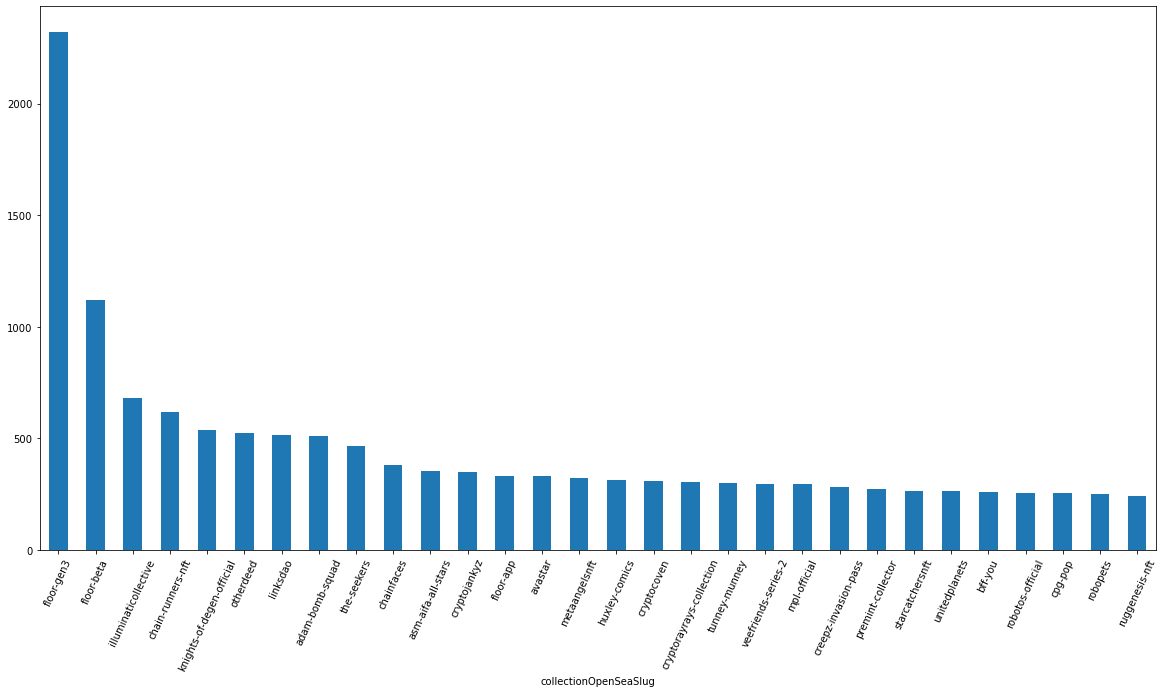

In [11]:
df.groupby("collectionOpenSeaSlug")["collectionOpenSeaSlug"] \
    .count() \
    .sort_values(ascending=False) \
    .head(30) \
    .plot \
    .bar(figsize=(20, 10), rot=65)
    

In [12]:
owners = df.groupby("ownerAddress")["ownerAddress"].count()

In [13]:
owners.sort_values(ascending=False).head(50)

ownerAddress
0x6186290b28d511bff971631c916244a9fc539cfe    2428
0x886478d3cf9581b624cb35b5446693fc8a58b787    1374
0x6df98185315270b653889c796509cbf7b943b9aa     831
0x1e341aa44c293d95d13d778492d417d1be4e63d5     813
0x5f4934fc98eae6061a01868a4700c53c1ffb7d2e     809
0xe4bbcbff51e61d0d95fcc5016609ac8354b177c4     809
0x49ca963ef75bceba8e4a5f4ceab5fd326bef6123     669
0xbad858a0cf09f210fcf35cbf83569178879b47f2     660
0xf9107317b0ff77ed5b7adea15e50514a3564002b     570
0x7b59793ad075e4ce1e35181054759c080b8d965d     516
0xfe5573c66273313034f7ff6050c54b5402553716     488
0xec7641e298af02c19171451381c570327389b0c2     472
0x3ba53cea97bfff5a303ffc66dc4f390383bcd62e     471
0xaf469c4a0914938e6149cf621c54fb4b1ec0c202     446
0x1010595f96ab62b31bfeac411ec5f8f60db5dc23     444
0x1b2965dc3b1697dd10b7126ec7393d79cda2cf91     437
0xd4db6d8ef756141de0d838808ddb8ffcd847d7ff     434
0x3686a4b272c646ef6fbe34377337d95db7356e63     433
0x679d5162bad71990abca0f18095948c12a2756b0     413
0xa41a4b84d74e085b

In [14]:
ownersWithCollections = df.groupby(["ownerAddress", "collectionOpenSeaSlug"])

In [15]:
ownersWithCollections.size().head(60)

ownerAddress                                collectionOpenSeaSlug                     
0x00063ddb30be7bc2292583d5f143e9d6e6228440  alien-frens-incubator                          1
                                            alienfrensnft                                  1
                                            animonkeys                                     1
                                            beanft-genesis                                 1
                                            catc                                           1
                                            creatureworld                                  1
                                            creepz-invasion-pass                           1
                                            creyzies                                       1
                                            cryptoadz-by-gremplin                          1
                                            cryptocoven                     

In [16]:
from sklearn.metrics.pairwise import pairwise_distances

In [17]:
ocs = ownersWithCollections.count()

In [18]:
ocs

assetContractAddress  \
ownerAddress                               collectionOpenSeaSlug                          
0x00063ddb30be7bc2292583d5f143e9d6e6228440 alien-frens-incubator                      1   
                                           alienfrensnft                              1   
                                           animonkeys                                 1   
                                           beanft-genesis                             1   
                                           catc                                       1   
...                                                                                 ...   
0xffd7fd0b03b42f12c2079d2717f504fae5597e56 cryptoadz-by-gremplin                      1   
                                           floor-gen3                                 1   
                                           n-project                                  4   
                                           ready-player-cat-nft                       1   
                                           visitors-of-imma-degen                     2   

                                                                   assetContractType  \
ownerAddress                               collectionOpenSeaSlug                       
0x00063ddb30be7bc2292583d5f143e9d6e6228440 alien-frens-incubator                   1   
                                           alienfrensnft                           1   
                                           animonkeys                              1   
                                           beanft-genesis                          1   
                                           catc                                    1   
...                                                                              ...   
0xffd7fd0b03b42f12c2079d2717f504fae5597e56 cryptoadz-by-gremplin                   1   
                                           floor-gen3                              1   
                                           n-project                               4   
                                           ready-player-cat-nft                    1   
                                           visitors-of-imma-degen                  2   

                                                                   assetContractSchema  \
ownerAddress                               collectionOpenSeaSlug                         
0x00063ddb30be7bc2292583d5f143e9d6e6228440 alien-frens-incubator                     1   
                                           alienfrensnft                             1   
                                           animonkeys                                1   
                                           beanft-genesis                            1   
                                           catc                                      1   
...                                                                                ...   
0xffd7fd0b03b42f12c2079d2717f504fae5597e56 cryptoadz-by-gremplin                     1   
                                           floor-gen3                                1   
                                           n-project                                 4   
                                           ready-player-cat-nft                      1   
                                           visitors-of-imma-degen                    2   

                                                                   tokenId  \
ownerAddress                               collectionOpenSeaSlug             
0x00063ddb30be7bc2292583d5f143e9d6e6228440 alien-frens-incubator         1   
                                           alienfrensnft                 1   
                                           animonkeys                    1   
                                           beanft-genesis                1   
                                           catc                          1   
...                  

In [19]:
df.loc[df['ownerAddress'] == '0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a']

,ownerAddress,assetContractAddress,assetContractType,assetContractSchema,tokenId,collectionName,collectionOpenSeaSlug,collectionUrl,count,numberOfOwners,floorPrice,averagePrice,marketCap,totalVolume
54070,0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0xe25f0fe686477f9df3c2876c4902d3b85f75f33a,semi-fungible,ERC1155,1,IlluminatiNFT DAO,illuminatidaotoken,https://illuminatinft.com/claim/,NaN,1383,0.0540,0.088803,0.056629,18.027104
54071,0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x05e7f2499ff153fea2f20bbde0b5584c911c0af1,non-fungible,ERC721,46,Something Token,somethingtoken,https://www.somethingtoken.com/,NaN,4624,0.0990,0.353356,2558.200567,5614.820423
54072,0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x05e7f2499ff153fea2f20bbde0b5584c911c0af1,non-fungible,ERC721,45,Something Token,somethingtoken,https://www.somethingtoken.com/,NaN,4624,0.0990,0.353356,2558.200567,5614.820423
54073,0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x05e7f2499ff153fea2f20bbde0b5584c911c0af1,non-fungible,ERC721,44,Something Token,somethingtoken,https://www.somethingtoken.com/,NaN,4624,0.0990,0.353356,2558.200567,5614.820423
54074,0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x05e7f2499ff153fea2f20bbde0b5584c911c0af1,non-fungible,ERC721,43,Something Token,somethingtoken,https://www.somethingtoken.com/,NaN,4624,0.0990,0.353356,2558.200567,5614.820423
54075,0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x05e7f2499ff153fea2f20bbde0b5584c911c0af1,non-fungible,ERC721,42,Something Token,somethingtoken,https://www.somethingtoken.com/,NaN,4624,0.0990,0.353356,2558.200567,5614.820423
54076,0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x05e7f2499ff153fea2f20bbde0b5584c911c0af1,non-fungible,ERC721,41,Something Token,somethingtoken,https://www.somethingtoken.com/,NaN,4624,0.0990,0.353356,2558.200567,5614.820423
54077,0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x05e7f2499ff153fea2f20bbde0b5584c911c0af1,non-fungible,ERC721,40,Something Token,somethingtoken,https://www.somethingtoken.com/,NaN,4624,0.0990,0.353356,2558.200567,5614.820423
54078,0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x05e7f2499ff153fea2f20bbde0b5584c911c0af1,non-fungible,ERC721,39,Something Token,somethingtoken,https://www.somethingtoken.com/,NaN,4624,0.0990,0.353356,2558.200567,5614.820423
54079,0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x05e7f2499ff153fea2f20bbde0b5584c911c0af1,non-fungible,ERC721,38,Something Token,somethingtoken,https://www.somethingtoken.com/,NaN,4624,0.0990,0.353356,2558.200567,5614.820423


In [20]:
ocs_count = ocs['assetContractAddress']

In [21]:
type(ocs_count)

pandas.core.series.Series

In [22]:
ocs_count= pd.DataFrame(ocs_count)

In [23]:
ocs_index = ocs_count.reset_index()

In [24]:
ocs_index

,ownerAddress,collectionOpenSeaSlug,assetContractAddress
0,0x00063ddb30be7bc2292583d5f143e9d6e6228440,alien-frens-incubator,1
1,0x00063ddb30be7bc2292583d5f143e9d6e6228440,alienfrensnft,1
2,0x00063ddb30be7bc2292583d5f143e9d6e6228440,animonkeys,1
3,0x00063ddb30be7bc2292583d5f143e9d6e6228440,beanft-genesis,1
4,0x00063ddb30be7bc2292583d5f143e9d6e6228440,catc,1
...,...,...,...
34438,0xffd7fd0b03b42f12c2079d2717f504fae5597e56,cryptoadz-by-gremplin,1
34439,0xffd7fd0b03b42f12c2079d2717f504fae5597e56,floor-gen3,1
34440,0xffd7fd0b03b42f12c2079d2717f504fae5597e56,n-project,4
34441,0xffd7fd0b03b42f12c2079d2717f504fae5597e56,ready-player-cat-nft,1


In [25]:
ocs_matrix = ocs_index.pivot(index='ownerAddress', columns='collectionOpenSeaSlug', values='assetContractAddress').fillna(0)

In [26]:
ocs_matrix.head(50)

collectionOpenSeaSlug,-b-b,-dummies,-glowa-,-spirits-,-submerge-,-subtraction-,0n1-force,0xapes-tribe,0xapes-trilogy,0xidentitiesgen1,...,zoofrenz-apefrenz-2-0,zoofrenz-first-class-pass,zoofrenznft,zoologic-by-ixnayokay,zukidirt,zuzana-breznanikova-art,zxdiacghxsts,zyklop,zyori-dreadlocks,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
ownerAddress,,,,,,,,,,,,,,,,,,,,,
0x00063ddb30be7bc2292583d5f143e9d6e6228440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x005df2c23953547d2502d39d32448f59bc9e61d3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x0064eda2574585714fa4956c4c003d4067931880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x00a56b4190b56bacdd3591c35f6cd419a0532cef,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x00b8b2081d8fd3c91e3f1955fb3ba56c3c31c88b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x00ce3a24da381d9dfa6fd27b8b4218b3068cbd3f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x00dbf4ed86edbb2edc01dc9264d33f9dd9151a87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x00f48c4f5441392df8d8b545369c48b2a81c7dd5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
ocs_matrix.loc[["0x00063ddb30be7bc2292583d5f143e9d6e6228440", "0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a"]]

collectionOpenSeaSlug,-b-b,-dummies,-glowa-,-spirits-,-submerge-,-subtraction-,0n1-force,0xapes-tribe,0xapes-trilogy,0xidentitiesgen1,...,zoofrenz-apefrenz-2-0,zoofrenz-first-class-pass,zoofrenznft,zoologic-by-ixnayokay,zukidirt,zuzana-breznanikova-art,zxdiacghxsts,zyklop,zyori-dreadlocks,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
ownerAddress,,,,,,,,,,,,,,,,,,,,,
0x00063ddb30be7bc2292583d5f143e9d6e6228440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

In [29]:
pdist(ocs_matrix.loc[['0x00063ddb30be7bc2292583d5f143e9d6e6228440', '0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a']])

array([13.22875656])

In [30]:
pdist(ocs_matrix.loc[['0x00063ddb30be7bc2292583d5f143e9d6e6228440', '0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a', '0x005df2c23953547d2502d39d32448f59bc9e61d3']])

array([13.22875656,  9.8488578 , 12.        ])

In [31]:
# pd.DataFrame(
#     squareform(pdist(ocs_matrix.loc[['floor-app', 'floor-beta', 'floor-gen3' ]])),
#     columns = ['floor-app', 'floor-beta', 'floor-gen3'],
#     index = ['floor-app', 'floor-beta', 'floor-gen3']
# )
users=['0x00063ddb30be7bc2292583d5f143e9d6e6228440', '0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a', '0x005df2c23953547d2502d39d32448f59bc9e61d3']
pd.DataFrame(
    squareform(pdist(ocs_matrix.loc[users], metric='cosine')),
    columns = users,
    index = users
)

,0x00063ddb30be7bc2292583d5f143e9d6e6228440,0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x005df2c23953547d2502d39d32448f59bc9e61d3
0x00063ddb30be7bc2292583d5f143e9d6e6228440,0.000000,0.988015,0.979415
0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0.988015,0.000000,0.898111
0x005df2c23953547d2502d39d32448f59bc9e61d3,0.979415,0.898111,0.000000


## Note
This makes sense because 0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a and 0x005df2c23953547d2502d39d32448f59bc9e61d3 are much more similar than 0x00063ddb30be7bc2292583d5f143e9d6e6228440.

```

0x00063ddb30be7bc2292583d5f143e9d6e6228440  alien-frens-incubator                          1
                                            alienfrensnft                                  1
                                            animonkeys                                     1
                                            beanft-genesis                                 1
                                            catc                                           1
                                            creatureworld                                  1
                                            creepz-invasion-pass                           1
                                            creyzies                                       1
                                            cryptoadz-by-gremplin                          1
                                            cryptocoven                                    3
                                            cryptozilla                                    1
                                            cupcatsofficial                                1
                                            doomsdayx-gen-01-haleek-maul-producer-nft      1
                                            filaments-art                                  1
                                            floor-gen3                                     1
                                            galaxyeggs9999                                 1
                                            imaginary-editions                             1
                                            larva-lads                                     1
                                            mfers                                          1
                                            multiversevm                                   1
                                            nuclear-nerds-of-the-accidental-apocalypse     4
                                            omgkirby-genesis                               1
                                            playboyrabbitars                               1
                                            quantum-curated                                2
                                            ready-player-cat-nft                           1
                                            rubberduckz                                    1
                                            sashimono-bushidos                             1
                                            synthetic-dreams                               1
                                            tubby-cats                                     2
                                            woodies-generative                             1

0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a  floor-app                                      1
                                            floor-beta                                     1
                                            floor-gen3                                     1
                                            illuminaticollective                           3
                                            illuminatidaotoken                             1
                                            mendel                                         1
                                            probablynothingnft                             1
                                            raretequila                                    1
                                            somethingtoken                                10
                                            the-flower-girls                               1
                                            unbearablebears                                1



                                            
0x005df2c23953547d2502d39d32448f59bc9e61d3  allstarfreaks                                  3
                                            bff-friendship-bracelets                       1
                                            bff-you                                        1
                                            bossbeauties                                   1
                                            cooldogsofficial                               2
                                            dao-house                                      2
                                            floor-app                                      1
                                            floor-beta                                     1
                                            floor-gen3                                     1
                                            floor-x-creepz                                 1
                                            illuminaticollective                           1
                                            illuminatidaotoken                             1
                                            knights-of-degen-official                      1
                                            linksdao                                       2
                                            lovelesscitymetropass                          2
                                            steedz-of-degen                                1
                                            womenrise                                      2
```

In [32]:
similarity_matrix = pd.DataFrame(
    squareform(pdist(ocs_matrix, metric='cosine')),
    columns = ocs_matrix.index,
    index = ocs_matrix.index
)

In [33]:
similarity_matrix

ownerAddress,0x00063ddb30be7bc2292583d5f143e9d6e6228440,0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x005df2c23953547d2502d39d32448f59bc9e61d3,0x0064eda2574585714fa4956c4c003d4067931880,0x00a56b4190b56bacdd3591c35f6cd419a0532cef,0x00b8b2081d8fd3c91e3f1955fb3ba56c3c31c88b,0x00ce3a24da381d9dfa6fd27b8b4218b3068cbd3f,0x00dbf4ed86edbb2edc01dc9264d33f9dd9151a87,0x00f48c4f5441392df8d8b545369c48b2a81c7dd5,0x010218a9ccf4e40286604f4c5ccaef4d8069c1f1,...,0xff4a64f60479113e7999d2e3dab79e8697496556,0xff6202e15773b4283dfa83d3559e70f293dd20ec,0xff9c5d0cef5d60309c73d6f9934f1e34fddb6e81,0xffac79f354ef893d2de0531fb0bc304c29082df6,0xffaef01b3b7439e799e72614cedf5e6b8a413e0f,0xffb3e5ba2759c172d909f26d65094433a77f1b27,0xffb4e4c6f6a73b84cf983fe5bff0181aedc6932b,0xffc8f98aa808c1bf6d599b79fe2198311823c030,0xffce201482a32122287658c588e0e0dfb3efccec,0xffd7fd0b03b42f12c2079d2717f504fae5597e56
ownerAddress,,,,,,,,,,,,,,,,,,,,,
0x00063ddb30be7bc2292583d5f143e9d6e6228440,0.000000,0.988015,0.979415,0.869811,0.869811,1.000000,0.876492,0.941778,0.972854,0.993399,...,0.950793,0.973425,1.000000,0.924835,0.986643,0.921493,0.988669,0.893701,0.846807,0.933018
0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0.988015,0.000000,0.898111,0.907943,0.907943,0.934906,0.970889,0.958831,0.980805,0.995333,...,0.965206,0.990604,0.907943,0.946851,0.990555,0.972244,0.991987,0.962418,0.801407,0.984212
0x005df2c23953547d2502d39d32448f59bc9e61d3,0.979415,0.898111,0.000000,0.841886,0.841886,0.888197,0.950000,0.929289,0.967031,0.983967,...,0.940239,0.919313,0.841886,0.908713,0.967556,0.952327,0.986238,0.870901,0.844957,0.972884
0x0064eda2574585714fa4956c4c003d4067931880,0.869811,0.907943,0.841886,0.000000,0.000000,1.000000,0.841886,1.000000,0.791486,0.949298,...,0.622036,0.897938,1.000000,0.422650,1.000000,0.698489,0.912961,0.591752,1.000000,0.828501
0x00a56b4190b56bacdd3591c35f6cd419a0532cef,0.869811,0.907943,0.841886,0.000000,0.000000,1.000000,0.841886,1.000000,0.791486,0.949298,...,0.622036,0.897938,1.000000,0.422650,1.000000,0.698489,0.912961,0.591752,1.000000,0.828501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0xffb3e5ba2759c172d909f26d65094433a77f1b27,0.921493,0.972244,0.952327,0.698489,0.698489,1.000000,0.952327,0.865160,0.937131,0.984713,...,0.886039,0.938454,1.000000,0.825922,0.969066,0.000000,0.973757,0.753817,1.000000,0.948291
0xffb4e4c6f6a73b84cf983fe5bff0181aedc6932b,0.988669,0.991987,0.986238,0.912961,0.912961,1.000000,0.986238,1.000000,0.981851,0.995587,...,0.967102,0.991117,1.000000,0.949748,1.000000,0.973757,0.000000,0.964467,1.000000,0.985073
0xffc8f98aa808c1bf6d599b79fe2198311823c030,0.893701,0.962418,0.870901,0.591752,0.591752,1.000000,0.935450,0.817426,0.914874,0.958602,...,0.845697,0.833333,1.000000,0.764298,0.916229,0.753817,0.964467,0.000000,1.000000,0.929986


In [34]:
ocs_index[ (ocs_index['ownerAddress'] == '0x00063ddb30be7bc2292583d5f143e9d6e6228440') | (ocs_index['ownerAddress'] == '0x00b8b2081d8fd3c91e3f1955fb3ba56c3c31c88b')]

,ownerAddress,collectionOpenSeaSlug,assetContractAddress
0,0x00063ddb30be7bc2292583d5f143e9d6e6228440,alien-frens-incubator,1
1,0x00063ddb30be7bc2292583d5f143e9d6e6228440,alienfrensnft,1
2,0x00063ddb30be7bc2292583d5f143e9d6e6228440,animonkeys,1
3,0x00063ddb30be7bc2292583d5f143e9d6e6228440,beanft-genesis,1
4,0x00063ddb30be7bc2292583d5f143e9d6e6228440,catc,1
5,0x00063ddb30be7bc2292583d5f143e9d6e6228440,creatureworld,1
6,0x00063ddb30be7bc2292583d5f143e9d6e6228440,creepz-invasion-pass,1
7,0x00063ddb30be7bc2292583d5f143e9d6e6228440,creyzies,1
8,0x00063ddb30be7bc2292583d5f143e9d6e6228440,cryptoadz-by-gremplin,1
9,0x00063ddb30be7bc2292583d5f143e9d6e6228440,cryptocoven,3


In [35]:
ocs_index[ (ocs_index['ownerAddress'] == '0xffc8f98aa808c1bf6d599b79fe2198311823c030') | (ocs_index['ownerAddress'] == '0x012cce0bc2a9d380e1f2cc97e4740b37dc289719')]

,ownerAddress,collectionOpenSeaSlug,assetContractAddress
105,0x012cce0bc2a9d380e1f2cc97e4740b37dc289719,floor-gen3,1
34415,0xffc8f98aa808c1bf6d599b79fe2198311823c030,creepz-invasion-pass,1
34416,0xffc8f98aa808c1bf6d599b79fe2198311823c030,ferndaddy,1
34417,0xffc8f98aa808c1bf6d599b79fe2198311823c030,firstdayout,1
34418,0xffc8f98aa808c1bf6d599b79fe2198311823c030,floor-gen3,1
34419,0xffc8f98aa808c1bf6d599b79fe2198311823c030,floor-x-creepz,1
34420,0xffc8f98aa808c1bf6d599b79fe2198311823c030,lizardtoonz,1


In [36]:
similarity_pairs = similarity_matrix.unstack()

In [37]:
similarity_pairs

ownerAddress                                ownerAddress                              
0x00063ddb30be7bc2292583d5f143e9d6e6228440  0x00063ddb30be7bc2292583d5f143e9d6e6228440    0.000000
                                            0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a    0.988015
                                            0x005df2c23953547d2502d39d32448f59bc9e61d3    0.979415
                                            0x0064eda2574585714fa4956c4c003d4067931880    0.869811
                                            0x00a56b4190b56bacdd3591c35f6cd419a0532cef    0.869811
                                                                                            ...   
0xffd7fd0b03b42f12c2079d2717f504fae5597e56  0xffb3e5ba2759c172d909f26d65094433a77f1b27    0.948291
                                            0xffb4e4c6f6a73b84cf983fe5bff0181aedc6932b    0.985073
                                            0xffc8f98aa808c1bf6d599b79fe2198311823c030    0.929986
                      

In [38]:
similarity_pairs.index.rename(['Address A', 'Address B'], inplace=True)

In [39]:
similarity_pairs = similarity_pairs.to_frame('cosine distance').reset_index()


In [40]:
similarity_pairs

,Address A,Address B,cosine distance
0,0x00063ddb30be7bc2292583d5f143e9d6e6228440,0x00063ddb30be7bc2292583d5f143e9d6e6228440,0.000000
1,0x00063ddb30be7bc2292583d5f143e9d6e6228440,0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0.988015
2,0x00063ddb30be7bc2292583d5f143e9d6e6228440,0x005df2c23953547d2502d39d32448f59bc9e61d3,0.979415
3,0x00063ddb30be7bc2292583d5f143e9d6e6228440,0x0064eda2574585714fa4956c4c003d4067931880,0.869811
4,0x00063ddb30be7bc2292583d5f143e9d6e6228440,0x00a56b4190b56bacdd3591c35f6cd419a0532cef,0.869811
...,...,...,...
4986284,0xffd7fd0b03b42f12c2079d2717f504fae5597e56,0xffb3e5ba2759c172d909f26d65094433a77f1b27,0.948291
4986285,0xffd7fd0b03b42f12c2079d2717f504fae5597e56,0xffb4e4c6f6a73b84cf983fe5bff0181aedc6932b,0.985073
4986286,0xffd7fd0b03b42f12c2079d2717f504fae5597e56,0xffc8f98aa808c1bf6d599b79fe2198311823c030,0.929986
4986287,0xffd7fd0b03b42f12c2079d2717f504fae5597e56,0xffce201482a32122287658c588e0e0dfb3efccec,1.000000


In [41]:
similarity_pairs[
    (similarity_pairs['cosine distance'] < 0.05) 
    & (similarity_pairs['cosine distance'] > 0.00) 
    & (similarity_pairs['Address A'] != similarity_pairs['Address B'])
]

,Address A,Address B,cosine distance
7935,0x0064eda2574585714fa4956c4c003d4067931880,0x8a3cedb8ba9f5c78fcffef512c79f4db3d5452b8,0.009133
8060,0x0064eda2574585714fa4956c4c003d4067931880,0x98db1d0a32d0783a1e689f226bdebb81e57f26d9,0.010173
8696,0x0064eda2574585714fa4956c4c003d4067931880,0xe43ab911fb88aa41286bfa46ceb8a74cb0cf7706,0.004963
8750,0x0064eda2574585714fa4956c4c003d4067931880,0xea1312a21a3656906fa564ca93303c23571c69ad,0.037750
10168,0x00a56b4190b56bacdd3591c35f6cd419a0532cef,0x8a3cedb8ba9f5c78fcffef512c79f4db3d5452b8,0.009133
...,...,...,...
4909495,0xfcda943622da57e2eeaf450ae0c8a696c8ed2212,0x98db1d0a32d0783a1e689f226bdebb81e57f26d9,0.010173
4910131,0xfcda943622da57e2eeaf450ae0c8a696c8ed2212,0xe43ab911fb88aa41286bfa46ceb8a74cb0cf7706,0.004963
4910185,0xfcda943622da57e2eeaf450ae0c8a696c8ed2212,0xea1312a21a3656906fa564ca93303c23571c69ad,0.037750
4943057,0xfdf8dd4cd68e77fb325c5e54e680cbfbaebb1e9e,0xa03768293ea10d9f96d26fa525688de8bfc53c44,0.037750


In [42]:
ocs_index[ (ocs_index['ownerAddress'] == '0x0064eda2574585714fa4956c4c003d4067931880') | (ocs_index['ownerAddress'] == '0x8a3cedb8ba9f5c78fcffef512c79f4db3d5452b8')]

,ownerAddress,collectionOpenSeaSlug,assetContractAddress
58,0x0064eda2574585714fa4956c4c003d4067931880,floor-gen3,1
18518,0x8a3cedb8ba9f5c78fcffef512c79f4db3d5452b8,floor-app,1
18519,0x8a3cedb8ba9f5c78fcffef512c79f4db3d5452b8,floor-beta,2
18520,0x8a3cedb8ba9f5c78fcffef512c79f4db3d5452b8,floor-gen3,18
18521,0x8a3cedb8ba9f5c78fcffef512c79f4db3d5452b8,proof-moonbirds,1


In [43]:
ocs_index[ (ocs_index['ownerAddress'] == '0x0064eda2574585714fa4956c4c003d4067931880') | (ocs_index['ownerAddress'] == '0x98db1d0a32d0783a1e689f226bdebb81e57f26d9')]

,ownerAddress,collectionOpenSeaSlug,assetContractAddress
58,0x0064eda2574585714fa4956c4c003d4067931880,floor-gen3,1
20521,0x98db1d0a32d0783a1e689f226bdebb81e57f26d9,floor-app,1
20522,0x98db1d0a32d0783a1e689f226bdebb81e57f26d9,floor-beta,9
20523,0x98db1d0a32d0783a1e689f226bdebb81e57f26d9,floor-gen3,63


In [44]:
similarity_pairs[
    (similarity_pairs['cosine distance'] < 0.05) 
    & (similarity_pairs['cosine distance'] > 0.03) 
    & (similarity_pairs['Address A'] != similarity_pairs['Address B'])
].sort_values(by='cosine distance')

,Address A,Address B,cosine distance
1198497,0x3ab51702f5a6507e54d4667b35bf187a574afd9b,0xb4f3ead1303b28c4d734896384f08529c017613f,0.031037
3593433,0xb4f3ead1303b28c4d734896384f08529c017613f,0x3ab51702f5a6507e54d4667b35bf187a574afd9b,0.031037
2578479,0x81482cd155a776123afa39f45fb090047016214a,0xb3faf0173af76711034a1155e1dc36af282452ec,0.033805
3567255,0xb3faf0173af76711034a1155e1dc36af282452ec,0x81482cd155a776123afa39f45fb090047016214a,0.033805
4692136,0xf12d002f261e96b92701e4f507910fcb8c95a1f7,0x41c0160c04458a933fe00d62b222d8412226aaf5,0.034112
...,...,...,...
3391601,0xab5f4d9a90e3bb2ff4375212ea06eb99d0174c29,0xdab3c7e6a91d18b30415f21baf4c02279dfbf522,0.048458
4693139,0xf12d002f261e96b92701e4f507910fcb8c95a1f7,0xb4a9b17d0abcb709107e5e4118c2ae1835631343,0.049005
3588299,0xb4a9b17d0abcb709107e5e4118c2ae1835631343,0xf12d002f261e96b92701e4f507910fcb8c95a1f7,0.049005
3903240,0xc6d5442b5f6b5aa7af0b232c3b5dbbeac1cd052c,0xfbc3459dec3cb526b7565c3c0e29539a07b18c7e,0.049686


In [45]:
ocs_index[ (ocs_index['ownerAddress'] == '0x3ab51702f5a6507e54d4667b35bf187a574afd9b') | (ocs_index['ownerAddress'] == '0xb4f3ead1303b28c4d734896384f08529c017613f')]

,ownerAddress,collectionOpenSeaSlug,assetContractAddress
7972,0x3ab51702f5a6507e54d4667b35bf187a574afd9b,floor-app,1
7973,0x3ab51702f5a6507e54d4667b35bf187a574afd9b,floor-beta,1
7974,0x3ab51702f5a6507e54d4667b35bf187a574afd9b,floor-gen3,4
24395,0xb4f3ead1303b28c4d734896384f08529c017613f,floor-beta,1
24396,0xb4f3ead1303b28c4d734896384f08529c017613f,floor-gen3,3


In [46]:
ocs_index[ (ocs_index['ownerAddress'] == '0xfbc3459dec3cb526b7565c3c0e29539a07b18c7e') | (ocs_index['ownerAddress'] == '0xc6d5442b5f6b5aa7af0b232c3b5dbbeac1cd052c')]

,ownerAddress,collectionOpenSeaSlug,assetContractAddress
26216,0xc6d5442b5f6b5aa7af0b232c3b5dbbeac1cd052c,floor-gen3,1
26217,0xc6d5442b5f6b5aa7af0b232c3b5dbbeac1cd052c,kidzold,19
26218,0xc6d5442b5f6b5aa7af0b232c3b5dbbeac1cd052c,maisondegoat,28
26219,0xc6d5442b5f6b5aa7af0b232c3b5dbbeac1cd052c,rickhousedao,1
33622,0xfbc3459dec3cb526b7565c3c0e29539a07b18c7e,apocalyptic-apes,1
33623,0xfbc3459dec3cb526b7565c3c0e29539a07b18c7e,ben-mezrich-bitcoin-and-billionaires,1
33624,0xfbc3459dec3cb526b7565c3c0e29539a07b18c7e,cakedapesofficial,1
33625,0xfbc3459dec3cb526b7565c3c0e29539a07b18c7e,cryptoongoonz,1
33626,0xfbc3459dec3cb526b7565c3c0e29539a07b18c7e,floor-gen3,1
33627,0xfbc3459dec3cb526b7565c3c0e29539a07b18c7e,kidzold,8


In [47]:
somewhat_similar = similarity_pairs[
    (similarity_pairs['cosine distance'] < 0.05) 
    & (similarity_pairs['cosine distance'] > 0.03) 
    & (similarity_pairs['Address A'] != similarity_pairs['Address B'])
].sort_values(by='cosine distance')

In [48]:
somewhat_similar

,Address A,Address B,cosine distance
1198497,0x3ab51702f5a6507e54d4667b35bf187a574afd9b,0xb4f3ead1303b28c4d734896384f08529c017613f,0.031037
3593433,0xb4f3ead1303b28c4d734896384f08529c017613f,0x3ab51702f5a6507e54d4667b35bf187a574afd9b,0.031037
2578479,0x81482cd155a776123afa39f45fb090047016214a,0xb3faf0173af76711034a1155e1dc36af282452ec,0.033805
3567255,0xb3faf0173af76711034a1155e1dc36af282452ec,0x81482cd155a776123afa39f45fb090047016214a,0.033805
4692136,0xf12d002f261e96b92701e4f507910fcb8c95a1f7,0x41c0160c04458a933fe00d62b222d8412226aaf5,0.034112
...,...,...,...
3391601,0xab5f4d9a90e3bb2ff4375212ea06eb99d0174c29,0xdab3c7e6a91d18b30415f21baf4c02279dfbf522,0.048458
4693139,0xf12d002f261e96b92701e4f507910fcb8c95a1f7,0xb4a9b17d0abcb709107e5e4118c2ae1835631343,0.049005
3588299,0xb4a9b17d0abcb709107e5e4118c2ae1835631343,0xf12d002f261e96b92701e4f507910fcb8c95a1f7,0.049005
3903240,0xc6d5442b5f6b5aa7af0b232c3b5dbbeac1cd052c,0xfbc3459dec3cb526b7565c3c0e29539a07b18c7e,0.049686


In [49]:
appended=pd.DataFrame(somewhat_similar.drop(columns='cosine distance').stack().reset_index()).drop(columns=['level_0', 'level_1'])

In [50]:
appended=appended.rename(columns={appended.columns[0]: "address"})

In [51]:
appended

,address
0,0x3ab51702f5a6507e54d4667b35bf187a574afd9b
1,0xb4f3ead1303b28c4d734896384f08529c017613f
2,0xb4f3ead1303b28c4d734896384f08529c017613f
3,0x3ab51702f5a6507e54d4667b35bf187a574afd9b
4,0x81482cd155a776123afa39f45fb090047016214a
...,...
899,0xf12d002f261e96b92701e4f507910fcb8c95a1f7
900,0xc6d5442b5f6b5aa7af0b232c3b5dbbeac1cd052c
901,0xfbc3459dec3cb526b7565c3c0e29539a07b18c7e
902,0xfbc3459dec3cb526b7565c3c0e29539a07b18c7e


In [52]:
appended=appended.drop_duplicates()

In [53]:
appended

,address
0,0x3ab51702f5a6507e54d4667b35bf187a574afd9b
1,0xb4f3ead1303b28c4d734896384f08529c017613f
4,0x81482cd155a776123afa39f45fb090047016214a
5,0xb3faf0173af76711034a1155e1dc36af282452ec
8,0xf12d002f261e96b92701e4f507910fcb8c95a1f7
...,...
877,0xe8dffa89216bb387f0328fceaa888d5bb8e9bdc1
892,0xdab3c7e6a91d18b30415f21baf4c02279dfbf522
893,0xab5f4d9a90e3bb2ff4375212ea06eb99d0174c29
900,0xc6d5442b5f6b5aa7af0b232c3b5dbbeac1cd052c


In [54]:
indexed_df = df.set_index('ownerAddress')

In [55]:
indexed_df

,assetContractAddress,assetContractType,assetContractSchema,tokenId,collectionName,collectionOpenSeaSlug,collectionUrl,count,numberOfOwners,floorPrice,averagePrice,marketCap,totalVolume
ownerAddress,,,,,,,,,,,,,
0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0x9e5bf3026a4f77971057cad44c0b6e02efa9a7cd,non-fungible,ERC721,3474,Purrnelopes Grandmas,purrnelopes-grandmas,https://www.purrnelopescountryclub.com/,NaN,398,0.075,0.045000,107.505000,0.045000
0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0x9378368ba6b85c1fba5b131b530f5f5bedf21a18,non-fungible,ERC721,44659,VeeFriends Series 2,veefriends-series-2,https://series2.veefriends.com,NaN,23003,0.609,1.249242,46790.198749,23903.001555
0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0x28472a58a490c5e09a238847f66a68a47cc76f0f,semi-fungible,ERC1155,1,adidas Originals Into the Metaverse,adidasoriginals,https://www.adidas.com/into_the_metaverse,NaN,21106,1.400,1.050434,3.005328,42715.897020
0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0xe0176ba60efddb29cac5b15338c9962daee9de0c,non-fungible,ERC721,884,PREMINT Collector Pass - OFFICIAL,premint-collector,https://collectors.premint.xyz/,NaN,8092,1.470,1.002666,13514.031194,11247.908987
0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0x0161b706371e0725e96c67cf55b2384540374cf1,semi-fungible,ERC1155,5,Tom Sachs: Rocket Factory - Mothership Tickets,tom-sachs-mothership-tickets,https://tomsachsrocketfactory.com/,NaN,2949,0.225,0.234413,1.937696,206.283497
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae,0x6e5a65b5f9dd7b1b08ff212e210dcd642de0db8b,non-fungible,ERC721,427,OctoHedz,octohedz,https://octohedz.com/,NaN,335,0.200,1.918495,0.000000,1398.582998
0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae,0x6e5a65b5f9dd7b1b08ff212e210dcd642de0db8b,non-fungible,ERC721,243,OctoHedz,octohedz,https://octohedz.com/,NaN,335,0.200,1.918495,0.000000,1398.582998
0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae,0xa7d8d9ef8d8ce8992df33d8b8cf4aebabd5bd270,non-fungible,ERC721,98000103,sail-o-bots by sturec,sail-o-bots-by-sturec,https://www.artblocks.io/project/98,NaN,418,2.600,3.668554,1526.250000,5711.938248


In [56]:
indexed_address= appended.set_index('address')

In [57]:
indexed_address

""
address
0x3ab51702f5a6507e54d4667b35bf187a574afd9b
0xb4f3ead1303b28c4d734896384f08529c017613f
0x81482cd155a776123afa39f45fb090047016214a
0xb3faf0173af76711034a1155e1dc36af282452ec
0xf12d002f261e96b92701e4f507910fcb8c95a1f7
...
0xe8dffa89216bb387f0328fceaa888d5bb8e9bdc1
0xdab3c7e6a91d18b30415f21baf4c02279dfbf522
0xab5f4d9a90e3bb2ff4375212ea06eb99d0174c29


In [58]:
indexed_address.index.rename('ownerAddress', inplace=True)

In [59]:
indexed_address.index

Index(['0x3ab51702f5a6507e54d4667b35bf187a574afd9b',
       '0xb4f3ead1303b28c4d734896384f08529c017613f',
       '0x81482cd155a776123afa39f45fb090047016214a',
       '0xb3faf0173af76711034a1155e1dc36af282452ec',
       '0xf12d002f261e96b92701e4f507910fcb8c95a1f7',
       '0x41c0160c04458a933fe00d62b222d8412226aaf5',
       '0x4d10f999dca699af02c4cd9690ac420ce00ddb46',
       '0xe632e3f69a102291b1e4e4e6a48ea559e5f656a1',
       '0xf84f133455677396eec37b12e3fd10944cd14c82',
       '0xf15587c661ba1acf9eb6781d7bbe117d6f778d51',
       ...
       '0xe128ed1b60372c406a871c4cbc5067bc8684255a',
       '0x8ea8373d571a5f29f35b32fa288ab2dcbb29e8d7',
       '0x92610feb91a723680a11d4cc25675d1c6148bfe3',
       '0x8a3cedb8ba9f5c78fcffef512c79f4db3d5452b8',
       '0xcf49f6a3c4b1475cee4b15b89d2fd0a79d61b079',
       '0xe8dffa89216bb387f0328fceaa888d5bb8e9bdc1',
       '0xdab3c7e6a91d18b30415f21baf4c02279dfbf522',
       '0xab5f4d9a90e3bb2ff4375212ea06eb99d0174c29',
       '0xc6d5442b5f6b5aa7af0b232c3

In [60]:
indexed_df.index

Index(['0xa072e41cb9259d82333c5d2a90655a6de45d2b89',
       '0xa072e41cb9259d82333c5d2a90655a6de45d2b89',
       '0xa072e41cb9259d82333c5d2a90655a6de45d2b89',
       '0xa072e41cb9259d82333c5d2a90655a6de45d2b89',
       '0xa072e41cb9259d82333c5d2a90655a6de45d2b89',
       '0xa072e41cb9259d82333c5d2a90655a6de45d2b89',
       '0xa072e41cb9259d82333c5d2a90655a6de45d2b89',
       '0xa072e41cb9259d82333c5d2a90655a6de45d2b89',
       '0xa072e41cb9259d82333c5d2a90655a6de45d2b89',
       '0xa072e41cb9259d82333c5d2a90655a6de45d2b89',
       ...
       '0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae',
       '0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae',
       '0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae',
       '0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae',
       '0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae',
       '0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae',
       '0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae',
       '0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae',
       '0xea03523a90e5fc7e424ccef2b

In [61]:
similar_filtered = indexed_df[indexed_df.index.isin(indexed_address.index)].reset_index()

In [62]:
similar_filtered

,ownerAddress,assetContractAddress,assetContractType,assetContractSchema,tokenId,collectionName,collectionOpenSeaSlug,collectionUrl,count,numberOfOwners,floorPrice,averagePrice,marketCap,totalVolume
0,0xbdcb581da271b87a82584046e16c46dffd6e7785,0xca7ca7bcc765f77339be2d648ba53ce9c8a262bd,non-fungible,ERC721,17455,tubby cats by tubby collective,tubby-cats,http://tubbycats.xyz,NaN,9184,0.145,0.651272,3684.912042,16978.011509
1,0xbdcb581da271b87a82584046e16c46dffd6e7785,0xca7ca7bcc765f77339be2d648ba53ce9c8a262bd,non-fungible,ERC721,18971,tubby cats by tubby collective,tubby-cats,http://tubbycats.xyz,NaN,9184,0.145,0.651272,3684.912042,16978.011509
2,0xbdcb581da271b87a82584046e16c46dffd6e7785,0xca7ca7bcc765f77339be2d648ba53ce9c8a262bd,non-fungible,ERC721,17247,tubby cats by tubby collective,tubby-cats,http://tubbycats.xyz,NaN,9184,0.145,0.651272,3684.912042,16978.011509
3,0xbdcb581da271b87a82584046e16c46dffd6e7785,0xca7ca7bcc765f77339be2d648ba53ce9c8a262bd,non-fungible,ERC721,13665,tubby cats by tubby collective,tubby-cats,http://tubbycats.xyz,NaN,9184,0.145,0.651272,3684.912042,16978.011509
4,0xbdcb581da271b87a82584046e16c46dffd6e7785,0xca7ca7bcc765f77339be2d648ba53ce9c8a262bd,non-fungible,ERC721,7912,tubby cats by tubby collective,tubby-cats,http://tubbycats.xyz,NaN,9184,0.145,0.651272,3684.912042,16978.011509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,0x3642ed7e8d382359bec01e4281c4c241a79e6406,0x2d92c4f9f75308d0b9b098b142369032e4f901ff,non-fungible,ERC721,1095,Floor App Gen 3,floor-gen3,https://floornfts.io,NaN,1575,0.148,0.175568,341.325872,91.997540
1960,0x87d4708c81783b9d9a94fb44f0284b7825a4bb66,0x2d92c4f9f75308d0b9b098b142369032e4f901ff,non-fungible,ERC721,1117,Floor App Gen 3,floor-gen3,https://floornfts.io,NaN,1575,0.148,0.175568,341.325872,91.997540
1961,0xf2ae3c7878c56dec7aec0d5efbb1e30db0bfff23,0x2d92c4f9f75308d0b9b098b142369032e4f901ff,non-fungible,ERC721,938,Floor App Gen 3,floor-gen3,https://floornfts.io,NaN,1575,0.148,0.175568,341.325872,91.997540
1962,0x4f3ac94e406e040ea8bf7c1fe188577a5a421934,0x2d92c4f9f75308d0b9b098b142369032e4f901ff,non-fungible,ERC721,1650,Floor App Gen 3,floor-gen3,https://floornfts.io,NaN,1575,0.148,0.175568,341.325872,91.997540


In [63]:
indexed_address[ indexed_address.index == '0xbdcb581da271b87a82584046e16c46dffd6e7785' ]

""
ownerAddress
0xbdcb581da271b87a82584046e16c46dffd6e7785


<AxesSubplot:xlabel='collectionOpenSeaSlug'>

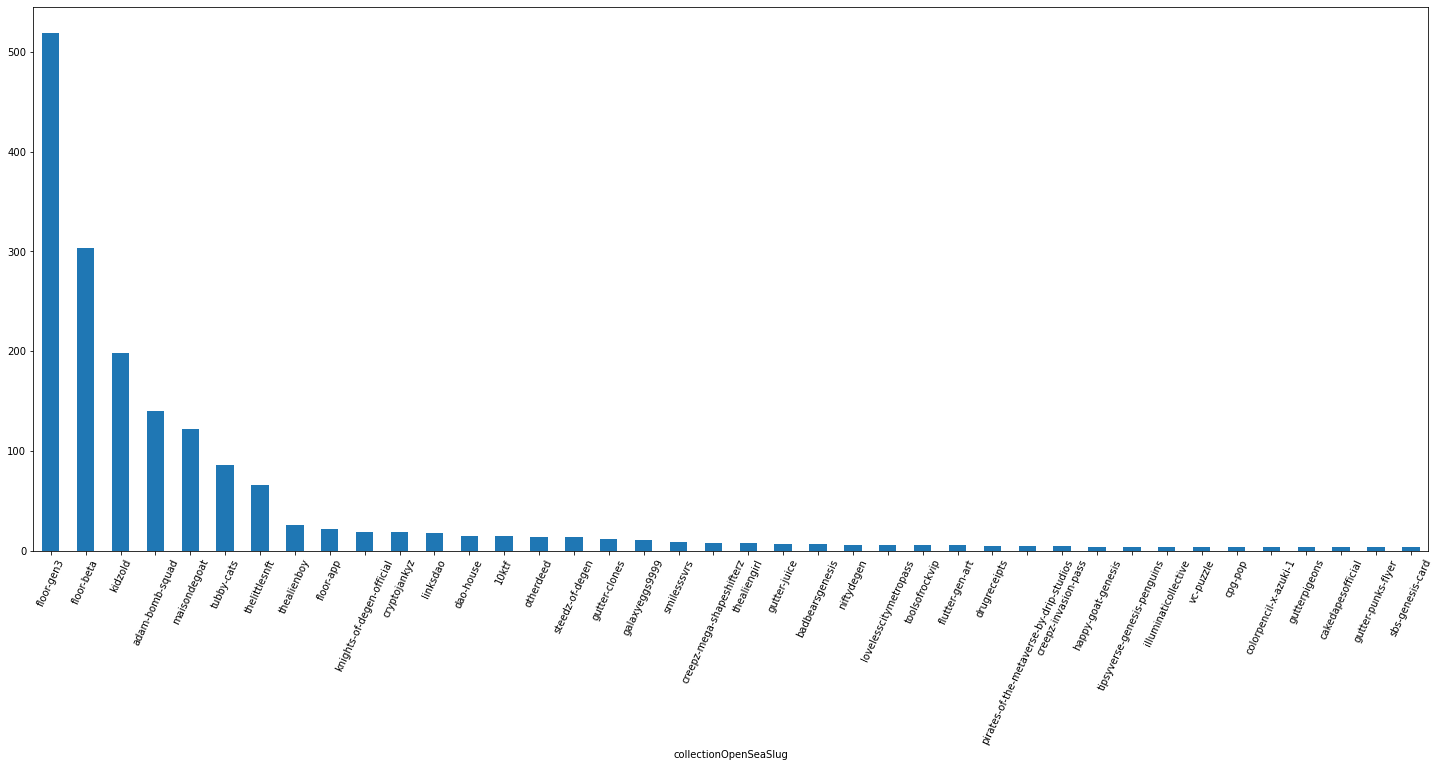

In [64]:
similar_filtered.groupby("collectionOpenSeaSlug")["collectionOpenSeaSlug"] \
    .count() \
    .sort_values(ascending=False) \
    .head(40) \
    .plot \
    .bar(figsize=(25, 10), rot=65)

In [65]:
indexed_df[ indexed_df['collectionOpenSeaSlug'] == 'kidzold' ]

,assetContractAddress,assetContractType,assetContractSchema,tokenId,collectionName,collectionOpenSeaSlug,collectionUrl,count,numberOfOwners,floorPrice,averagePrice,marketCap,totalVolume
ownerAddress,,,,,,,,,,,,,
0x0d43e9d9812c0d7c63c7cbe873526030307d921f,0xda416fc5eaddb67d3710aebbf1923c2357c7d511,non-fungible,ERC721,2535,OLD KIDZ (DO NOT BUY),kidzold,http://MaisonDeGoat.com/KIDz,NaN,748,0.125,0.102324,0.0,56.687375
0x0d43e9d9812c0d7c63c7cbe873526030307d921f,0xda416fc5eaddb67d3710aebbf1923c2357c7d511,non-fungible,ERC721,2534,OLD KIDZ (DO NOT BUY),kidzold,http://MaisonDeGoat.com/KIDz,NaN,748,0.125,0.102324,0.0,56.687375
0x0d43e9d9812c0d7c63c7cbe873526030307d921f,0xda416fc5eaddb67d3710aebbf1923c2357c7d511,non-fungible,ERC721,2533,OLD KIDZ (DO NOT BUY),kidzold,http://MaisonDeGoat.com/KIDz,NaN,748,0.125,0.102324,0.0,56.687375
0x0d43e9d9812c0d7c63c7cbe873526030307d921f,0xda416fc5eaddb67d3710aebbf1923c2357c7d511,non-fungible,ERC721,2532,OLD KIDZ (DO NOT BUY),kidzold,http://MaisonDeGoat.com/KIDz,NaN,748,0.125,0.102324,0.0,56.687375
0x0d43e9d9812c0d7c63c7cbe873526030307d921f,0xda416fc5eaddb67d3710aebbf1923c2357c7d511,non-fungible,ERC721,2531,OLD KIDZ (DO NOT BUY),kidzold,http://MaisonDeGoat.com/KIDz,NaN,748,0.125,0.102324,0.0,56.687375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x9d30ca11c4a2fa4479ca14710c60a3bd4c1ca2f1,0xda416fc5eaddb67d3710aebbf1923c2357c7d511,non-fungible,ERC721,210,OLD KIDZ (DO NOT BUY),kidzold,http://MaisonDeGoat.com/KIDz,NaN,748,0.125,0.102324,0.0,56.687375
0x9d30ca11c4a2fa4479ca14710c60a3bd4c1ca2f1,0xda416fc5eaddb67d3710aebbf1923c2357c7d511,non-fungible,ERC721,208,OLD KIDZ (DO NOT BUY),kidzold,http://MaisonDeGoat.com/KIDz,NaN,748,0.125,0.102324,0.0,56.687375
0x9d30ca11c4a2fa4479ca14710c60a3bd4c1ca2f1,0xda416fc5eaddb67d3710aebbf1923c2357c7d511,non-fungible,ERC721,148,OLD KIDZ (DO NOT BUY),kidzold,http://MaisonDeGoat.com/KIDz,NaN,748,0.125,0.102324,0.0,56.687375


## There's only about 10 holders of kidzold that own about 200 ish tokens

In [66]:
indexed_df[ indexed_df['collectionOpenSeaSlug'] == 'adam-bomb-squad' ].index

Index(['0x67744f4b07a3708da6a2362739cc0872e81a6555',
       '0x92a93805eef9e123a1668562a382da5d0ad1f2a5',
       '0x2d89cc4e013db2908b877c51d39ff63982761c96',
       '0x8d1bced2a1fdcb9f5255b454695854ce6f381055',
       '0x8d1bced2a1fdcb9f5255b454695854ce6f381055',
       '0x8d1bced2a1fdcb9f5255b454695854ce6f381055',
       '0x8d1bced2a1fdcb9f5255b454695854ce6f381055',
       '0x8d1bced2a1fdcb9f5255b454695854ce6f381055',
       '0x407530d583c17e858b143940701f21b01cb73d1b',
       '0x1010595f96ab62b31bfeac411ec5f8f60db5dc23',
       ...
       '0x37c4e5f85f3c92679facdf0b6aeca8819904939b',
       '0x37c4e5f85f3c92679facdf0b6aeca8819904939b',
       '0x37c4e5f85f3c92679facdf0b6aeca8819904939b',
       '0x37c4e5f85f3c92679facdf0b6aeca8819904939b',
       '0x37c4e5f85f3c92679facdf0b6aeca8819904939b',
       '0x6b4464be86a5c07a689ebc860a351ab2b5e5f71f',
       '0x6b4464be86a5c07a689ebc860a351ab2b5e5f71f',
       '0xd4773a7b457904656aefcb4553874fb9bac5661d',
       '0xbad858a0cf09f210fcf35cbf8

In [67]:
indexed_df

,assetContractAddress,assetContractType,assetContractSchema,tokenId,collectionName,collectionOpenSeaSlug,collectionUrl,count,numberOfOwners,floorPrice,averagePrice,marketCap,totalVolume
ownerAddress,,,,,,,,,,,,,
0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0x9e5bf3026a4f77971057cad44c0b6e02efa9a7cd,non-fungible,ERC721,3474,Purrnelopes Grandmas,purrnelopes-grandmas,https://www.purrnelopescountryclub.com/,NaN,398,0.075,0.045000,107.505000,0.045000
0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0x9378368ba6b85c1fba5b131b530f5f5bedf21a18,non-fungible,ERC721,44659,VeeFriends Series 2,veefriends-series-2,https://series2.veefriends.com,NaN,23003,0.609,1.249242,46790.198749,23903.001555
0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0x28472a58a490c5e09a238847f66a68a47cc76f0f,semi-fungible,ERC1155,1,adidas Originals Into the Metaverse,adidasoriginals,https://www.adidas.com/into_the_metaverse,NaN,21106,1.400,1.050434,3.005328,42715.897020
0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0xe0176ba60efddb29cac5b15338c9962daee9de0c,non-fungible,ERC721,884,PREMINT Collector Pass - OFFICIAL,premint-collector,https://collectors.premint.xyz/,NaN,8092,1.470,1.002666,13514.031194,11247.908987
0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0x0161b706371e0725e96c67cf55b2384540374cf1,semi-fungible,ERC1155,5,Tom Sachs: Rocket Factory - Mothership Tickets,tom-sachs-mothership-tickets,https://tomsachsrocketfactory.com/,NaN,2949,0.225,0.234413,1.937696,206.283497
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae,0x6e5a65b5f9dd7b1b08ff212e210dcd642de0db8b,non-fungible,ERC721,427,OctoHedz,octohedz,https://octohedz.com/,NaN,335,0.200,1.918495,0.000000,1398.582998
0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae,0x6e5a65b5f9dd7b1b08ff212e210dcd642de0db8b,non-fungible,ERC721,243,OctoHedz,octohedz,https://octohedz.com/,NaN,335,0.200,1.918495,0.000000,1398.582998
0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae,0xa7d8d9ef8d8ce8992df33d8b8cf4aebabd5bd270,non-fungible,ERC721,98000103,sail-o-bots by sturec,sail-o-bots-by-sturec,https://www.artblocks.io/project/98,NaN,418,2.600,3.668554,1526.250000,5711.938248


## How many Floor holders are holding illuminati 

In [283]:
illuminati_nfs = indexed_df[ indexed_df[ 'collectionOpenSeaSlug'] == 'illuminaticollective' ]
illuminati_nfs

,assetContractAddress,assetContractType,assetContractSchema,tokenId,collectionName,collectionOpenSeaSlug,collectionUrl,count,numberOfOwners,floorPrice,averagePrice,marketCap,totalVolume
ownerAddress,,,,,,,,,,,,,
0xd4db6d8ef756141de0d838808ddb8ffcd847d7ff,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,1612,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836
0x1010595f96ab62b31bfeac411ec5f8f60db5dc23,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,2725,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836
0x1010595f96ab62b31bfeac411ec5f8f60db5dc23,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,2724,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836
0x1010595f96ab62b31bfeac411ec5f8f60db5dc23,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,2723,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836
0x662d4ad86cac5fcffbb044c9bb276282d65ae8df,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,6849,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x8993a06149003550bf910c99241b99a356cf04ae,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,6684,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836
0xe4f44bc4520d3161bef03f62967bc361082b3ae0,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,8114,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836
0x13cc93d1426bc9cbc446c3c99e4de833fa36aade,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,6885,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836


In [121]:
illuminati_nfs.index.unique()

Index(['0xd4db6d8ef756141de0d838808ddb8ffcd847d7ff',
       '0x1010595f96ab62b31bfeac411ec5f8f60db5dc23',
       '0x662d4ad86cac5fcffbb044c9bb276282d65ae8df',
       '0x077754db4f4f667f9c965b2089b897296357eae3',
       '0x32dc14c4df5f9c80581c423c8ee3cc7b2defd181',
       '0x14ae8100ea85a11bbb36578f83ab1b5c1cfdd61c',
       '0x78748aa54c254d67b52ac4b6e8a58bb4269ff053',
       '0x49ca963ef75bceba8e4a5f4ceab5fd326bef6123',
       '0xbf7486fd2506ed285bae7e13cbd2305741aa029d',
       '0x9dc6b63e000efe5ea8a0a79fe852941db5f505c0',
       ...
       '0xb8f305617ac00a9404cafa82226ee5bd0c85f914',
       '0x0a264e1ee0e75b428688cb615e32f31e836baee0',
       '0x4a347d1d36c7a5be7d2e59e1e34af373be96e6bd',
       '0x707bd897076fa15fb0d4c5bb404687ae98ffa4e9',
       '0xd906979081fcb040f00213e86fb887a12de2c495',
       '0x5c5dbeafca8cc47661820425bf9745282ad32801',
       '0x8993a06149003550bf910c99241b99a356cf04ae',
       '0xe4f44bc4520d3161bef03f62967bc361082b3ae0',
       '0x13cc93d1426bc9cbc446c3c99

In [129]:
illuminati_holders = indexed_df[ indexed_df.index.isin(illuminati_nfs.index.unique()) ]

In [130]:
illuminati_holders

,assetContractAddress,assetContractType,assetContractSchema,tokenId,collectionName,collectionOpenSeaSlug,collectionUrl,count,numberOfOwners,floorPrice,averagePrice,marketCap,totalVolume
ownerAddress,,,,,,,,,,,,,
0xd4db6d8ef756141de0d838808ddb8ffcd847d7ff,0x020cdc4775366ae436f13a7d333143432e884934,non-fungible,ERC721,6297,ATEM Membership Cards,atem-cards,https://atemcarclub.com/,NaN,1990,0.469,0.445831,5552.829239,103.432869
0xd4db6d8ef756141de0d838808ddb8ffcd847d7ff,0x7eaa96d48380802a75ed6d74b91e2b30c3d474c1,non-fungible,ERC721,768,"CPG Pop: by ""Crypto Packaged"" GOODS",cpg-pop,https://cryptopackagedgoods.com,NaN,2049,1.990,3.228272,8645.313101,2579.389533
0xd4db6d8ef756141de0d838808ddb8ffcd847d7ff,0x05745e72fb8b4a9b51118a168d956760e4a36444,non-fungible,ERC721,9612,NFT Worlds Genesis Avatars,nft-worlds-genesis-avatars,https://nftworlds.com/avatars,NaN,4673,0.270,0.453265,4557.523855,552.530072
0xd4db6d8ef756141de0d838808ddb8ffcd847d7ff,0x05745e72fb8b4a9b51118a168d956760e4a36444,non-fungible,ERC721,9430,NFT Worlds Genesis Avatars,nft-worlds-genesis-avatars,https://nftworlds.com/avatars,NaN,4673,0.270,0.453265,4557.523855,552.530072
0xd4db6d8ef756141de0d838808ddb8ffcd847d7ff,0x05745e72fb8b4a9b51118a168d956760e4a36444,non-fungible,ERC721,9429,NFT Worlds Genesis Avatars,nft-worlds-genesis-avatars,https://nftworlds.com/avatars,NaN,4673,0.270,0.453265,4557.523855,552.530072
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0xbbc07c45fe0bd19b3c8187c7c170da7c7b8461e3,0xa7d8d9ef8d8ce8992df33d8b8cf4aebabd5bd270,non-fungible,ERC721,116000493,Flowers by RVig,flowers-by-rvig,https://www.artblocks.io/project/116,NaN,3065,0.069,0.294983,337.458400,2068.127784
0xbbc07c45fe0bd19b3c8187c7c170da7c7b8461e3,0xa32422dfb5bf85b2084ef299992903eb93ff52b0,non-fungible,ERC721,797,Animonkeys,animonkeys,https://www.animetas.io/,NaN,907,0.100,0.409454,265.946970,1823.297826
0xbbc07c45fe0bd19b3c8187c7c170da7c7b8461e3,0xa32422dfb5bf85b2084ef299992903eb93ff52b0,non-fungible,ERC721,277,Animonkeys,animonkeys,https://www.animetas.io/,NaN,907,0.100,0.409454,265.946970,1823.297826


In [131]:
illuminati_holders.groupby("collectionOpenSeaSlug")["collectionOpenSeaSlug"] \
    .count() \
    .filter(items=["floor-app", "floor-beta", "floor-gen3"]) \
    .sort_values(ascending=False)

collectionOpenSeaSlug
floor-gen3    258
floor-beta    209
floor-app      50
Name: collectionOpenSeaSlug, dtype: int64

### The answer is above, let's validate:

In [264]:
def containsCollections(group, collections):
    strings = group['collectionOpenSeaSlug'].unique()
    contains = np.isin(element=strings, test_elements=collections)
    count = contains.sum()
    if count == len(collections):
        return group

In [359]:
df_containsFloorAndIllu = df.groupby('ownerAddress').apply(containsCollections, collections=['illuminaticollective', 'floor-app']).dropna(how='all').set_index('ownerAddress')

In [360]:
df_containsFloorAndIllu

,assetContractAddress,assetContractType,assetContractSchema,tokenId,collectionName,collectionOpenSeaSlug,collectionUrl,count,numberOfOwners,floorPrice,averagePrice,marketCap,totalVolume
ownerAddress,,,,,,,,,,,,,
0xd4db6d8ef756141de0d838808ddb8ffcd847d7ff,0x020cdc4775366ae436f13a7d333143432e884934,non-fungible,ERC721,6297,ATEM Membership Cards,atem-cards,https://atemcarclub.com/,NaN,1990.0,0.469,0.445831,5552.829239,103.432869
0xd4db6d8ef756141de0d838808ddb8ffcd847d7ff,0x7eaa96d48380802a75ed6d74b91e2b30c3d474c1,non-fungible,ERC721,768,"CPG Pop: by ""Crypto Packaged"" GOODS",cpg-pop,https://cryptopackagedgoods.com,NaN,2049.0,1.990,3.228272,8645.313101,2579.389533
0xd4db6d8ef756141de0d838808ddb8ffcd847d7ff,0x05745e72fb8b4a9b51118a168d956760e4a36444,non-fungible,ERC721,9612,NFT Worlds Genesis Avatars,nft-worlds-genesis-avatars,https://nftworlds.com/avatars,NaN,4673.0,0.270,0.453265,4557.523855,552.530072
0xd4db6d8ef756141de0d838808ddb8ffcd847d7ff,0x05745e72fb8b4a9b51118a168d956760e4a36444,non-fungible,ERC721,9430,NFT Worlds Genesis Avatars,nft-worlds-genesis-avatars,https://nftworlds.com/avatars,NaN,4673.0,0.270,0.453265,4557.523855,552.530072
0xd4db6d8ef756141de0d838808ddb8ffcd847d7ff,0x05745e72fb8b4a9b51118a168d956760e4a36444,non-fungible,ERC721,9429,NFT Worlds Genesis Avatars,nft-worlds-genesis-avatars,https://nftworlds.com/avatars,NaN,4673.0,0.270,0.453265,4557.523855,552.530072
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x005df2c23953547d2502d39d32448f59bc9e61d3,0x56681458e00cafe1206313d2d033946f458fdefd,non-fungible,ERC721,3718,Cool Dogs Official,cooldogsofficial,https://cooldogs.io/,NaN,2382.0,0.088,0.189973,455.296809,1778.528046
0x005df2c23953547d2502d39d32448f59bc9e61d3,0x495f947276749ce646f68ac8c248420045cb7b5e,semi-fungible,ERC1155,9690941227474034713150470616669974140758022937...,Floor App Gen 1,floor-app,https://twitter.com/floornfts,NaN,332.0,1.150,0.398713,1.014167,302.224090
0x005df2c23953547d2502d39d32448f59bc9e61d3,0xe3f92992bb4f0f0d173623a52b2922d65172601d,non-fungible,ERC721,8631,Knights of Degen,knights-of-degen-official,https://www.knightsofdegen.io/,NaN,2545.0,0.250,0.315782,2559.241701,2649.726220


In [361]:
test_df = df_containsFloorAndIllu[ (df_containsFloorAndIllu['collectionOpenSeaSlug'] == 'floor-app') | (df_containsFloorAndIllu['collectionOpenSeaSlug'] == 'illuminaticollective') ]

In [363]:
test_df.sort_values(by='ownerAddress').head(20)

,assetContractAddress,assetContractType,assetContractSchema,tokenId,collectionName,collectionOpenSeaSlug,collectionUrl,count,numberOfOwners,floorPrice,averagePrice,marketCap,totalVolume
ownerAddress,,,,,,,,,,,,,
0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,7324,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447.0,0.1438,0.487131,1192.719588,4625.793836
0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,3516,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447.0,0.1438,0.487131,1192.719588,4625.793836
0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,3515,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447.0,0.1438,0.487131,1192.719588,4625.793836
0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x495f947276749ce646f68ac8c248420045cb7b5e,semi-fungible,ERC1155,9690941227474034713150470616669974140758022937...,Floor App Gen 1,floor-app,https://twitter.com/floornfts,NaN,332.0,1.1500,0.398713,1.014167,302.224090
0x005df2c23953547d2502d39d32448f59bc9e61d3,0x495f947276749ce646f68ac8c248420045cb7b5e,semi-fungible,ERC1155,9690941227474034713150470616669974140758022937...,Floor App Gen 1,floor-app,https://twitter.com/floornfts,NaN,332.0,1.1500,0.398713,1.014167,302.224090
0x005df2c23953547d2502d39d32448f59bc9e61d3,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,3981,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447.0,0.1438,0.487131,1192.719588,4625.793836
0x023192b16a986dc4e5cb76c1ec2f4d2de4d08462,0x495f947276749ce646f68ac8c248420045cb7b5e,semi-fungible,ERC1155,9690941227474034713150470616669974140758022937...,Floor App Gen 1,floor-app,https://twitter.com/floornfts,NaN,332.0,1.1500,0.398713,1.014167,302.224090
0x023192b16a986dc4e5cb76c1ec2f4d2de4d08462,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,1192,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447.0,0.1438,0.487131,1192.719588,4625.793836
0x023192b16a986dc4e5cb76c1ec2f4d2de4d08462,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,1193,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447.0,0.1438,0.487131,1192.719588,4625.793836


In [364]:
test_df.index.unique()

Index(['0xd4db6d8ef756141de0d838808ddb8ffcd847d7ff',
       '0x1010595f96ab62b31bfeac411ec5f8f60db5dc23',
       '0x662d4ad86cac5fcffbb044c9bb276282d65ae8df',
       '0x077754db4f4f667f9c965b2089b897296357eae3',
       '0x32dc14c4df5f9c80581c423c8ee3cc7b2defd181',
       '0x14ae8100ea85a11bbb36578f83ab1b5c1cfdd61c',
       '0x78748aa54c254d67b52ac4b6e8a58bb4269ff053',
       '0x49ca963ef75bceba8e4a5f4ceab5fd326bef6123',
       '0xbf7486fd2506ed285bae7e13cbd2305741aa029d',
       '0x9dc6b63e000efe5ea8a0a79fe852941db5f505c0',
       '0x890cfea8781de068ac401e72b9f3b97bae98a65b',
       '0x29ac2d2a79dfc7b29277e328235f572c7e626b9c',
       '0x1288d72d68ef614a3b3b1dbf7f77413b159d781e',
       '0x6b807b1cc7e5cb402f4d9647042d94411c5e6c34',
       '0xc249e787e8da101a80c8b2972603eadbcba5d212',
       '0xeac855c5e53f41910bed79ca1803302174e1efc2',
       '0xc00cabbf6432f6d9ef8d2270b07ee400238a1a0e',
       '0x318e4ba3fb1ca449868e48c060b0fc11da173b8b',
       '0x77527a52ad75aeb5f9cc9466d933764938b9

In [365]:
test_df.index.unique().size

50

^ This is why the group by is correct.

In [370]:
test_df.to_csv('floor_app_illuminati.csv')

Check beta group

In [367]:
df_floorBeta = df.groupby('ownerAddress').apply(containsCollections, collections=['illuminaticollective', 'floor-beta']).dropna(how='all').set_index('ownerAddress')

In [374]:
floorbeta_illu = df_floorBeta[ (df_floorBeta['collectionOpenSeaSlug'] == 'floor-beta') | (df_floorBeta['collectionOpenSeaSlug'] == 'illuminaticollective') ]

In [375]:
floorbeta_illu[ (floorbeta_illu['collectionOpenSeaSlug'] == 'illuminaticollective') ].index.unique()

Index(['0x9581677edfa83a31035e179fc16e1e78434c183f',
       '0xa41a4b84d74e085bd463386d55c3b6dde6aa2759',
       '0x8d3bc45d7b30013c37c141f6ce7c981b2613efaa',
       '0x2ab700c09139aa495e10b54df57aeae4b5dcaf20',
       '0xd791341128718249aefbecb3e7d505679d612a5e',
       '0xfc5446efe679f109f2772e45ea623caa63791d5e',
       '0x970427f4a855d55c4e68453923647b99875fa478',
       '0xda48bef797d97729b067ccfc10b61b51f8532832',
       '0xef8d8caf3d6eab7fd179687844adec1dc40972a2',
       '0x5e6ae73dfbe52411b400f2131d1b1350d47cc1f4',
       ...
       '0x75256a46e98eb0f9c4eefc197eb3dd88d559a771',
       '0x679d5162bad71990abca0f18095948c12a2756b0',
       '0x15f5f7b532ad6361092d24ade7a17e54cce0dd75',
       '0x0c4012a8715e759615c0a92f6463a2d516899c72',
       '0x7524abf5fe718f2ec5c47f4761a392bf026b9421',
       '0x9db4b0796453280d1a3ae174efc68a2e8a8901fc',
       '0x005df2c23953547d2502d39d32448f59bc9e61d3',
       '0xec7641e298af02c19171451381c570327389b0c2',
       '0x0a264e1ee0e75b428688cb615

In [377]:
floorbeta_illu.to_csv('floor_beta_illuminati.csv')

Check Gen 3:

In [352]:
df_floorgen3 = df.groupby('ownerAddress').apply(containsCollections, collections=['illuminaticollective', 'floor-gen3']).dropna(how='all').set_index('ownerAddress')

In [353]:
floorgen3_illu = df_floorgen3[ (df_floorgen3['collectionOpenSeaSlug'] == 'floor-gen3') | (df_floorgen3['collectionOpenSeaSlug'] == 'illuminaticollective') ]

In [354]:
floorgen3_illu.to_csv('floor_gen3_illuminati.csv')

In [356]:
floorgen3_illu.index.unique().size

126

## Illuminati market data

In [284]:
illuminati_market_data = df.query('collectionOpenSeaSlug == "illuminaticollective"').head(1).iloc[0]

In [286]:
illuminati_market_data['numberOfOwners']

3447

In [287]:
illuminati_market_data['floorPrice']

0.1438

In [288]:
illuminati_market_data['totalVolume']

4625.79383624123

In [323]:
illuminati_market_data['count'] = 8128
illuminati_market_data['count']


8128

## How many illuminati NFTs are held by floor app holders


In [289]:
df.groupby("collectionOpenSeaSlug")["collectionOpenSeaSlug"] \
    .count() \
    .filter(items=["floor-app", "floor-beta", "floor-gen3"]) \
    .sort_values(ascending=False)

collectionOpenSeaSlug
floor-gen3    2319
floor-beta    1118
floor-app      332
Name: collectionOpenSeaSlug, dtype: int64

## Unique Floor holders across all gens

In [330]:
illuminati_holders.index.unique().size

226

In [292]:
df_containsFloorAndIllu[ (df_containsFloorAndIllu['collectionOpenSeaSlug'] == 'illuminaticollective')]

,ownerAddress,assetContractAddress,assetContractType,assetContractSchema,tokenId,collectionName,collectionOpenSeaSlug,collectionUrl,count,numberOfOwners,floorPrice,averagePrice,marketCap,totalVolume
2205,0xd4db6d8ef756141de0d838808ddb8ffcd847d7ff,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,1612,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447.0,0.1438,0.487131,1192.719588,4625.793836
3192,0x1010595f96ab62b31bfeac411ec5f8f60db5dc23,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,2725,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447.0,0.1438,0.487131,1192.719588,4625.793836
3193,0x1010595f96ab62b31bfeac411ec5f8f60db5dc23,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,2724,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447.0,0.1438,0.487131,1192.719588,4625.793836
3194,0x1010595f96ab62b31bfeac411ec5f8f60db5dc23,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,2723,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447.0,0.1438,0.487131,1192.719588,4625.793836
3990,0x662d4ad86cac5fcffbb044c9bb276282d65ae8df,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,6849,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447.0,0.1438,0.487131,1192.719588,4625.793836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82237,0x9db4b0796453280d1a3ae174efc68a2e8a8901fc,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,2960,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447.0,0.1438,0.487131,1192.719588,4625.793836
82238,0x9db4b0796453280d1a3ae174efc68a2e8a8901fc,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,2959,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447.0,0.1438,0.487131,1192.719588,4625.793836
82239,0x9db4b0796453280d1a3ae174efc68a2e8a8901fc,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,2958,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447.0,0.1438,0.487131,1192.719588,4625.793836
82240,0x9db4b0796453280d1a3ae174efc68a2e8a8901fc,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,2957,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447.0,0.1438,0.487131,1192.719588,4625.793836


In [306]:
illuminatis_by_floor_app = df_containsFloorAndIllu[ (df_containsFloorAndIllu['collectionOpenSeaSlug'] == 'illuminaticollective')].index
illuminatis_by_floor_app_count = illuminatis_by_floor_app.size
illuminatis_by_floor_app_count

199

#### This is the number of illuminati NFTs held by floor-app holders ^

In [309]:
df_containsFloorBetaAndIllu = df.groupby('ownerAddress').apply(containsCollections, collections=['illuminaticollective', 'floor-beta']).dropna(how='all')
illuminatis_by_floor_beta = df_containsFloorBetaAndIllu[ (df_containsFloorBetaAndIllu['collectionOpenSeaSlug'] == 'illuminaticollective')].index
illuminatis_by_floor_beta_count = illuminatis_by_floor_beta.size
illuminatis_by_floor_beta_count

399

#### This is the number of illuminati NFTs held by floor-beta holders ^

In [397]:
df_containsFloorGen3AndIllu = df.groupby('ownerAddress').apply(containsCollections, collections=['illuminaticollective', 'floor-gen3']).dropna(how='all')
df_containsFloorGen3AndIllu.to_csv('df_containsFloorGen3AndIllu.csv')
illuminatis_by_floor_gen3 = df_containsFloorGen3AndIllu[ (df_containsFloorGen3AndIllu['collectionOpenSeaSlug'] == 'illuminaticollective')].index
illuminatis_by_floor_gen3_count = illuminatis_by_floor_gen3.size
illuminatis_by_floor_gen3_count

373

In [313]:
number_floor_app_held_illumiati = illuminatis_by_floor_app_count+illuminatis_by_floor_beta_count+illuminatis_by_floor_gen3_count
number_floor_app_held_illumiati

971

### This is the total number of floor held illuminati ^

## The saturation of floor holders in illuminati:

In [324]:
number_floor_app_held_illumiati/illuminati_market_data['count']

0.11946358267716535

## Largest Floor and Illuminati holders

In [392]:
indexed_df[ indexed_df['collectionOpenSeaSlug'] == 'illuminaticollective' ].sort_values(by='ownerAddress').head(20)

,assetContractAddress,assetContractType,assetContractSchema,tokenId,collectionName,collectionOpenSeaSlug,collectionUrl,count,numberOfOwners,floorPrice,averagePrice,marketCap,totalVolume
ownerAddress,,,,,,,,,,,,,
0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,3515,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836
0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,7324,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836
0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,3516,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836
0x005df2c23953547d2502d39d32448f59bc9e61d3,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,3981,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836
0x023192b16a986dc4e5cb76c1ec2f4d2de4d08462,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,6609,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836
0x023192b16a986dc4e5cb76c1ec2f4d2de4d08462,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,5461,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836
0x023192b16a986dc4e5cb76c1ec2f4d2de4d08462,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,1193,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836
0x023192b16a986dc4e5cb76c1ec2f4d2de4d08462,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,1192,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836
0x023192b16a986dc4e5cb76c1ec2f4d2de4d08462,0x26badf693f2b103b021c670c852262b379bbbe8a,non-fungible,ERC721,1191,IlluminatiNFT,illuminaticollective,https://www.illuminatinft.com/,NaN,3447,0.1438,0.487131,1192.719588,4625.793836


In [387]:
illuminati_counts = pd.DataFrame(indexed_df[ indexed_df['collectionOpenSeaSlug'] == 'illuminaticollective' ].groupby('ownerAddress').count()['collectionOpenSeaSlug'])

In [391]:
illuminati_counts.sort_values(by='ownerAddress')

,collectionOpenSeaSlug
ownerAddress,
0x001a9d8fc5916cf5a1c43dbca0e937006fa1412a,3
0x005df2c23953547d2502d39d32448f59bc9e61d3,1
0x023192b16a986dc4e5cb76c1ec2f4d2de4d08462,5
0x049cd1f76d337179d0660d6bcbbf7d3b04f4055e,2
0x04e5b349ec959ef84f1ed57a74d34a185790cc16,3
...,...
0xfc5446efe679f109f2772e45ea623caa63791d5e,3
0xfce3754e75d57778ac509642fa0f6add3d8ddd92,2
0xfd563357f69a79730ea1fe71da71a283cab3c3b7,1


In [393]:
illuminati_counts.sort_values(by='collectionOpenSeaSlug', ascending=False)

,collectionOpenSeaSlug
ownerAddress,
0x8da288c9fdaa754f2eeadf8145222bd1cc8782ff,15
0x7dd18efd62a5ec66abbacfb4938be3ac6692931c,15
0x9dc6b63e000efe5ea8a0a79fe852941db5f505c0,14
0xee6d73de0d19b72911482f8be59ab6a8e3a780dc,13
0x993a69efe73e3f87df4276e40e81e426385fd2d8,11
...,...
0x2ecaf6b220f6b1a09a79397592fa569fda534637,1
0x8c77466881fce81229bdee4993e71781531604d2,1
0x8c2650aab5ed6c5349e477ff42ac9df1b792882b,1


In [395]:
illuminati_counts['collectionOpenSeaSlug'].sum()

680

In [396]:
indexed_df

,assetContractAddress,assetContractType,assetContractSchema,tokenId,collectionName,collectionOpenSeaSlug,collectionUrl,count,numberOfOwners,floorPrice,averagePrice,marketCap,totalVolume
ownerAddress,,,,,,,,,,,,,
0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0x9e5bf3026a4f77971057cad44c0b6e02efa9a7cd,non-fungible,ERC721,3474,Purrnelopes Grandmas,purrnelopes-grandmas,https://www.purrnelopescountryclub.com/,NaN,398,0.075,0.045000,107.505000,0.045000
0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0x9378368ba6b85c1fba5b131b530f5f5bedf21a18,non-fungible,ERC721,44659,VeeFriends Series 2,veefriends-series-2,https://series2.veefriends.com,NaN,23003,0.609,1.249242,46790.198749,23903.001555
0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0x28472a58a490c5e09a238847f66a68a47cc76f0f,semi-fungible,ERC1155,1,adidas Originals Into the Metaverse,adidasoriginals,https://www.adidas.com/into_the_metaverse,NaN,21106,1.400,1.050434,3.005328,42715.897020
0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0xe0176ba60efddb29cac5b15338c9962daee9de0c,non-fungible,ERC721,884,PREMINT Collector Pass - OFFICIAL,premint-collector,https://collectors.premint.xyz/,NaN,8092,1.470,1.002666,13514.031194,11247.908987
0xa072e41cb9259d82333c5d2a90655a6de45d2b89,0x0161b706371e0725e96c67cf55b2384540374cf1,semi-fungible,ERC1155,5,Tom Sachs: Rocket Factory - Mothership Tickets,tom-sachs-mothership-tickets,https://tomsachsrocketfactory.com/,NaN,2949,0.225,0.234413,1.937696,206.283497
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae,0x6e5a65b5f9dd7b1b08ff212e210dcd642de0db8b,non-fungible,ERC721,427,OctoHedz,octohedz,https://octohedz.com/,NaN,335,0.200,1.918495,0.000000,1398.582998
0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae,0x6e5a65b5f9dd7b1b08ff212e210dcd642de0db8b,non-fungible,ERC721,243,OctoHedz,octohedz,https://octohedz.com/,NaN,335,0.200,1.918495,0.000000,1398.582998
0xea03523a90e5fc7e424ccef2b3e7d1ac3c90cdae,0xa7d8d9ef8d8ce8992df33d8b8cf4aebabd5bd270,non-fungible,ERC721,98000103,sail-o-bots by sturec,sail-o-bots-by-sturec,https://www.artblocks.io/project/98,NaN,418,2.600,3.668554,1526.250000,5711.938248
